# **Import the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import the Dataset**

In [3]:
data = pd.read_csv("House_Price.csv")
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,None,47,YES,0.060694


# **Pre-Processing**

### **Categorical Data**

In [4]:
data.dtypes

price             float64
crime_rate        float64
resid_area        float64
air_qual          float64
room_num          float64
age               float64
dist1             float64
dist2             float64
dist3             float64
dist4             float64
teachers class    float64
poor_prop         float64
airport            object
waterbody          object
rainfall            int64
bus_ter            object
parks             float64
dtype: object

In [5]:
data.bus_ter.value_counts()

YES    506
Name: bus_ter, dtype: int64

In [6]:
data.airport.value_counts()

YES    279
NO     227
Name: airport, dtype: int64

In [7]:
data1 = data.replace({"airport" : "YES"}, 1).replace({"airport" : "NO"}, 0)
data2 = data1.drop("bus_ter", axis = 1)

In [8]:
data2.waterbody.value_counts()

River             183
None              155
Lake               97
Lake and River     71
Name: waterbody, dtype: int64

In [9]:
data3 = data2[data2["waterbody"] != "None"].reset_index().drop("index", axis = 1)
data3

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,waterbody,rainfall,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,River,23,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,Lake,42,0.046146
2,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,Lake,45,0.047151
3,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,Lake,55,0.039474
4,22.9,0.08829,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,1,River,41,0.052170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,21.2,0.23912,39.69,0.585,6.019,65.3,2.68,2.25,2.58,2.12,20.8,12.92,1,River,32,0.054546
347,17.5,0.17783,39.69,0.585,5.569,73.5,2.46,2.39,2.49,2.26,20.8,15.10,0,Lake,47,0.063466
348,16.8,0.22438,39.69,0.585,6.027,79.7,2.64,2.47,2.82,2.06,20.8,14.33,0,Lake,54,0.052497
349,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,Lake and River,27,0.056006


In [10]:
data4 = pd.get_dummies(data3)
data4

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,rainfall,parks,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,23,0.049347,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,42,0.046146,1,0,0
2,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,45,0.047151,1,0,0
3,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,55,0.039474,1,0,0
4,22.9,0.08829,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,1,41,0.052170,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,21.2,0.23912,39.69,0.585,6.019,65.3,2.68,2.25,2.58,2.12,20.8,12.92,1,32,0.054546,0,0,1
347,17.5,0.17783,39.69,0.585,5.569,73.5,2.46,2.39,2.49,2.26,20.8,15.10,0,47,0.063466,1,0,0
348,16.8,0.22438,39.69,0.585,6.027,79.7,2.64,2.47,2.82,2.06,20.8,14.33,0,54,0.052497,1,0,0
349,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,27,0.056006,0,1,0


### **Missing Values**

In [11]:
data4.isnull().sum()

price                       0
crime_rate                  0
resid_area                  0
air_qual                    0
room_num                    0
age                         0
dist1                       0
dist2                       0
dist3                       0
dist4                       0
teachers class              0
poor_prop                   0
airport                     0
rainfall                    0
parks                       0
waterbody_Lake              0
waterbody_Lake and River    0
waterbody_River             0
dtype: int64

### **Outlier Data**

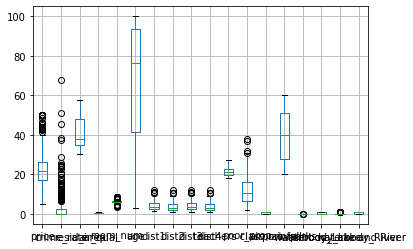

In [12]:
data4.boxplot()

### **Duplicate Data**

In [13]:
data4.duplicated().sum()

0

# **Feature Scaling**

In [14]:
X = data4.iloc[:,1:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

In [18]:
X_mm_df = pd.DataFrame(X_mm, columns = data4.iloc[:,1:].columns)

In [1]:
data5 = pd.concat([X_mm_df, data4.iloc[:,0]], axis = 1)

NameError: name 'pd' is not defined

In [21]:
data5

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,rainfall,parks,waterbody_Lake,waterbody_Lake and River,waterbody_River,price
0,0.000000,0.067815,0.304802,0.577505,0.641607,0.274135,0.256410,0.271262,0.285586,0.712766,0.084882,1.0,0.075,0.279575,0.0,0.0,1.0,24.0
1,0.000309,0.242302,0.160752,0.547998,0.782698,0.332423,0.337912,0.355416,0.380180,0.446809,0.200277,0.0,0.550,0.217843,1.0,0.0,0.0,21.6
2,0.000384,0.063050,0.137787,0.658555,0.441813,0.443534,0.450549,0.448523,0.461261,0.351064,0.028294,1.0,0.625,0.237220,1.0,0.0,0.0,33.4
3,0.000924,0.063050,0.137787,0.687105,0.528321,0.438980,0.444139,0.467323,0.452252,0.351064,0.094591,0.0,0.875,0.089206,1.0,0.0,0.0,36.2
4,0.001207,0.271628,0.275574,0.469630,0.656025,0.412568,0.408425,0.407341,0.392793,0.723404,0.291540,1.0,0.525,0.333998,0.0,0.0,1.0,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.003428,0.338343,0.402923,0.470971,0.642636,0.122040,0.113553,0.128021,0.115315,0.297872,0.305132,1.0,0.300,0.379809,0.0,0.0,1.0,21.2
347,0.002525,0.338343,0.402923,0.384748,0.727085,0.102004,0.126374,0.119964,0.127928,0.297872,0.365603,0.0,0.675,0.551806,1.0,0.0,0.0,17.5
348,0.003211,0.338343,0.402923,0.472504,0.790937,0.118397,0.133700,0.149508,0.109910,0.297872,0.344244,0.0,0.850,0.340312,1.0,0.0,0.0,16.8
349,0.000829,0.420455,0.377871,0.580954,0.681771,0.118397,0.131868,0.144136,0.109910,0.106383,0.214979,0.0,0.175,0.407956,0.0,1.0,0.0,22.4


# **Feature Selection**

In [22]:
data5.corr()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,rainfall,parks,waterbody_Lake,waterbody_Lake and River,waterbody_River,price
crime_rate,1.000000,0.438623,0.446072,-0.311087,0.393965,-0.404806,-0.404619,-0.403941,-0.398824,-0.316312,0.528817,-0.063676,0.066273,0.398449,0.006864,-0.000310,-0.005896,-0.426587
resid_area,0.438623,1.000000,0.759078,-0.416597,0.627471,-0.690514,-0.690687,-0.691637,-0.690311,-0.386340,0.630303,-0.102802,0.094697,0.703438,0.001969,0.093461,-0.076917,-0.507642
air_qual,0.446072,0.759078,1.000000,-0.314719,0.746299,-0.763386,-0.763723,-0.762924,-0.760039,-0.189044,0.621302,-0.059924,0.100864,0.913966,-0.030646,0.040107,-0.004817,-0.431830
room_num,-0.311087,-0.416597,-0.314719,1.000000,-0.243093,0.234122,0.229529,0.228279,0.229196,0.375428,-0.614223,0.177735,-0.054860,-0.288781,-0.025490,-0.004204,0.026199,0.725426
age,0.393965,0.627471,0.746299,-0.243093,1.000000,-0.745993,-0.745134,-0.746940,-0.746522,-0.252221,0.620173,-0.010190,0.082367,0.686386,0.041608,0.025086,-0.057420,-0.375833
dist1,-0.404806,-0.690514,-0.763386,0.234122,-0.745993,1.000000,0.997932,0.997608,0.994136,0.240271,-0.523790,0.014620,-0.035299,-0.703330,0.026269,-0.043802,0.011707,0.257055
dist2,-0.404619,-0.690687,-0.763723,0.229529,-0.745134,0.997932,1.000000,0.998212,0.994146,0.239846,-0.522014,0.011348,-0.041992,-0.703783,0.030073,-0.045637,0.009777,0.253918
dist3,-0.403941,-0.691637,-0.762924,0.228279,-0.746940,0.997608,0.998212,1.000000,0.994232,0.243012,-0.519555,0.009096,-0.043823,-0.705155,0.023523,-0.044278,0.014548,0.251919
dist4,-0.398824,-0.690311,-0.760039,0.229196,-0.746522,0.994136,0.994146,0.994232,1.000000,0.237836,-0.521398,0.009350,-0.039561,-0.701529,0.019145,-0.035408,0.011334,0.251445
teachers class,-0.316312,-0.386340,-0.189044,0.375428,-0.252221,0.240271,0.239846,0.243012,0.237836,1.000000,-0.411328,0.108364,-0.116720,-0.187590,0.018826,-0.093015,0.057944,0.511070


In [23]:
data6 = data5.iloc[:,[3,-1]]
data6

,room_num,price
0,0.577505,24.0
1,0.547998,21.6
2,0.658555,33.4
3,0.687105,36.2
4,0.469630,22.9
...,...,...
346,0.470971,21.2
347,0.384748,17.5
348,0.472504,16.8
349,0.580954,22.4


# **Splitting the Dataset into the Training set and Test set**

In [24]:
X = data6.iloc[:,:-1]
Y = data6.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0)

# **Training the linear Regression Model on the Training set**

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Predict the Test set Results**

In [28]:
y_pred = lr.predict(X_test)
y_pred

array([20.35113802, 16.96162412, 15.39087378, 18.17688886, 21.56640275,
       15.04365529, 42.67232707, 18.51584025, 20.39247355, 22.41791478,
       22.16163446, 20.44207619, 24.58389683, 22.92220831,  9.17400928,
       20.48341173, 28.4198345 , 27.54352116, 35.36420443, 22.88087278,
       23.93906248,  4.92471625, 17.02776098, 22.93874253, 22.37657925,
       19.07800353, 21.49199879, 20.49167884, 30.53621391, 39.95244884,
       22.81473592, 22.23603843, 23.76545323, 25.56768257, 19.99565241,
       18.84652453, 21.66560804, 34.29774762, 26.31998931, 20.70662362,
       24.21187701, 25.92316817, 27.37817901, 11.82775064, 21.32665665,
       23.08755045, 18.30916257, 36.21571646, 21.65734093, 19.45002335,
       25.10472457, 21.32665665, 18.30916257, 23.43476895, 21.69867647,
       22.04589496, 33.91746069, 18.6894495 , 21.1530474 , 21.47546458,
       14.9361829 , 21.58293697, 20.85543155, 19.70630367, 30.0567217 ,
       18.09421779, 18.72251793, 14.56416308, 32.88407231, 25.43

# **Validation**

In [ ]:
from sklearn.metrics import r2_score


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred,Y_test ) )